<a href="https://colab.research.google.com/github/vjferro/data_-science/blob/main/Projeto_Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto do Curso Python para Análise de Dados#




> Esse projeto tem o objetivo de criar uma análise exploratoria dos dados encontrados publicamente sobre Startups Unicornios. No dataset disponibilizado pelo professor Odemir Depieri é possível perceber uma série temporal da evução das empresas unicornios destacando informações como Valor da empresa, data de adesão, pais, cidade, setor e investidores. O objetivo desse estudo é praticar a maipulação e preparação preliminar dos dados bem como plotar as primeiras visualizações para um posterior aprofundamento analítico. 

> *Bibliotecas utilizadas nesse estudo: Pandas, Matplotlib e Seaborn.*  



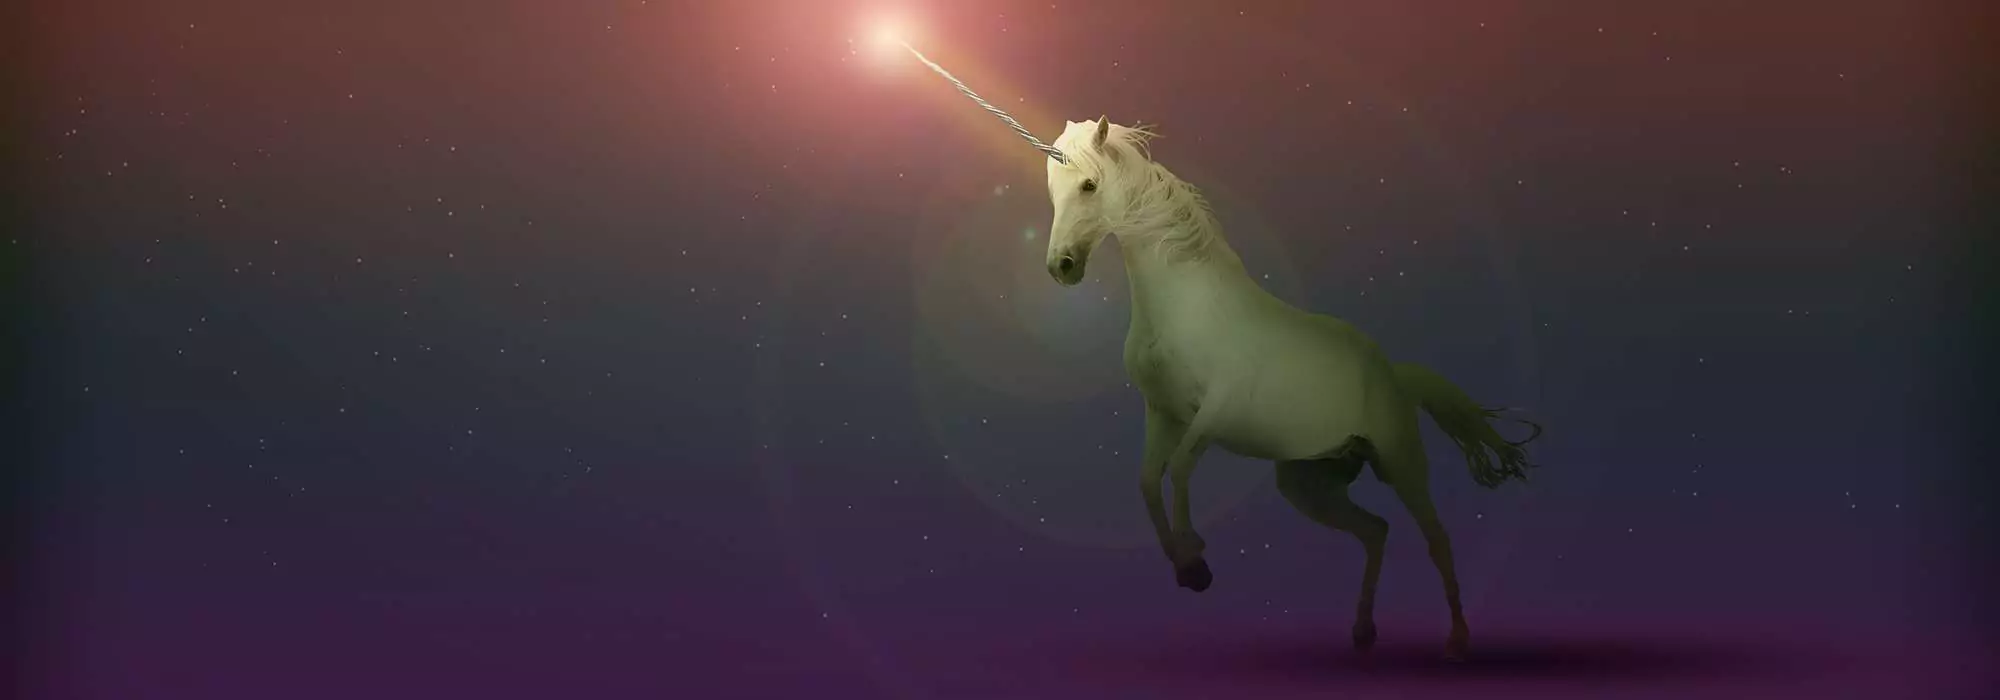





In [ ]:
# Importando as bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lendo os dados
base_dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso - Python para Análise de Dados/Projetos do Curso/Startup_2021.csv')

# Verificando as dimensões do DataFrame 
base_dados.shape

(936, 8)

In [ ]:
# Primeiros Registros
base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
# Listando todas as colunas do DataFrame
base_dados.columns 

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [ ]:
# Renomeando as colunas
base_dados.rename(columns= {
    'Unnamed: 0':'ID', 
    'Company':'Empresa', 
    'Valuation ($B)':'Valor ($)', 
    'Date Joined':'Data de Adesão', 
    'Country':'Pais',
    'City':'Cidade', 
    'Industry':'Setor',
    'Select Investors':'Investidores',
}, inplace=True)

In [ ]:
# Verificando o DataFrame
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
# Verificando campos nulos no DataFrame
base_dados.isnull().sum()

ID                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

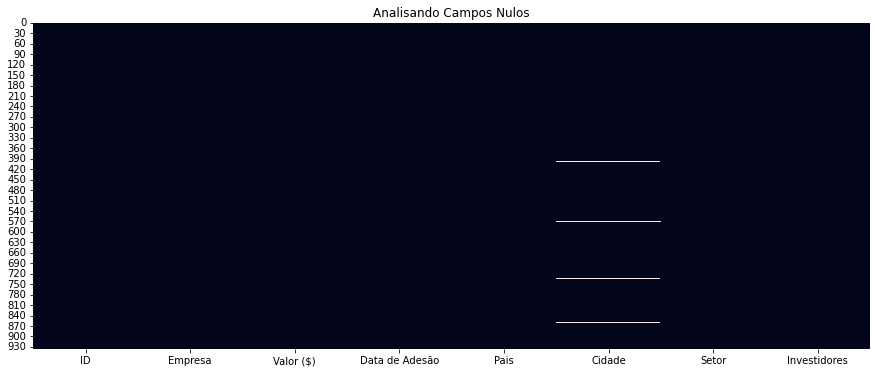

In [ ]:
# Visualizando os valores nulos com heatmap
plt.figure(figsize=(15,6))
plt.title('Analisando Campos Nulos')
sns.heatmap(base_dados.isnull(), cbar=False);

In [ ]:
# Campos unicos
base_dados.nunique()

ID                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [ ]:
# Verificando valores únicos de uma coluna do DataFrame
base_dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [ ]:
# Fazendo um Ranking com valores únicos
base_dados['Setor'].value_counts() 

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [ ]:
# Fazendo um Ranking com valores únicos em valores percentuais
base_dados['Setor'].value_counts(normalize=True) 

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

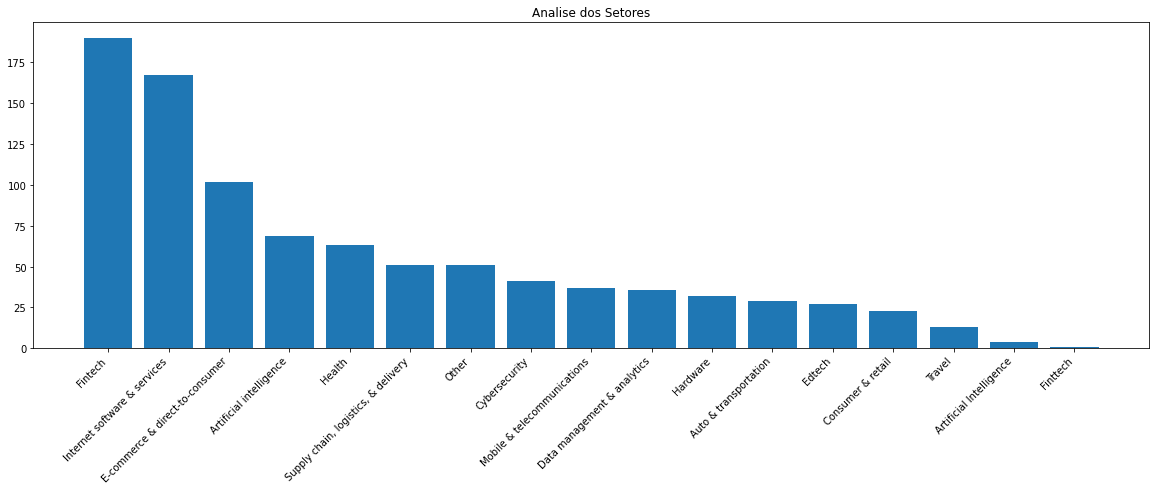

In [86]:
# Gráfico do Ranking com valores únicos
plt.figure(figsize=(20,6))
plt.title('Analise dos Setores')
plt.bar(base_dados['Setor'].value_counts().index, base_dados['Setor'].value_counts())
plt.xticks(rotation=45, ha='right');

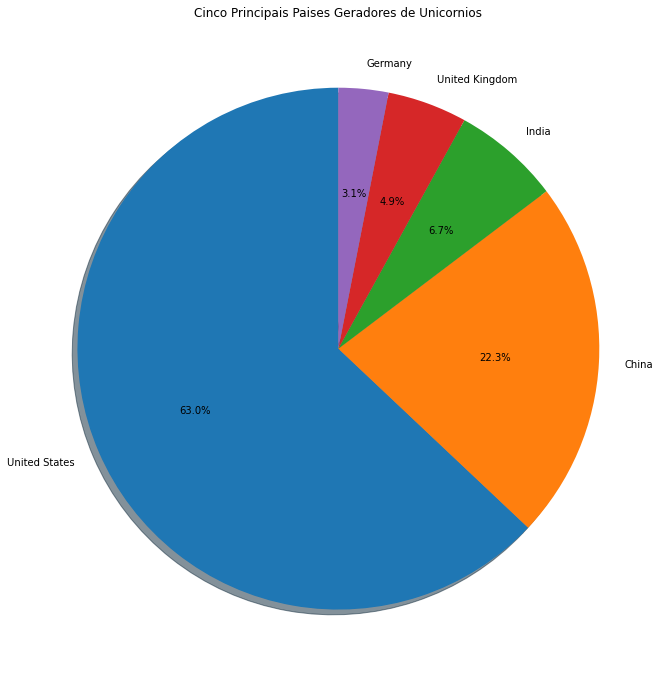

In [87]:
# Criando variável dos principais paises geradores de unicornios 
Analise = round(base_dados['Pais'].value_counts(normalize=True)* 100, 1)
# Gráfico dos dez principais paises geradores de unicornios
plt.figure(figsize=(25,12))
plt.title('Cinco Principais Paises Geradores de Unicornios')
plt.pie(
    Analise.head(5),
    labels= Analise.index[0:5],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'

);


In [ ]:
# Convertento coluna Data de Adesão para o formato Data 
base_dados['Data de Adesão'] = pd.to_datetime(base_dados['Data de Adesão'])
base_dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [ ]:
# Extraido Mês e Ano da coluna de datas "Data de Adesão"
base_dados['mês'] = pd.DatetimeIndex(base_dados['Data de Adesão']).month
base_dados['Ano'] = pd.DatetimeIndex(base_dados['Data de Adesão']).year
base_dados.head()

,ID,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,mês,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# Criando uma Tabela de análise de Paises por mês e ano
analise_paises = base_dados.groupby(by=['Pais','mês','Ano']).count()['ID'].reset_index()
analise_paises

,Pais,mês,Ano,ID
0,Argentina,8,2021,1
1,Australia,1,2018,1
2,Australia,3,2019,1
3,Australia,5,2021,1
4,Australia,7,2021,2
...,...,...,...,...
373,United States,12,2019,2
374,United States,12,2020,12
375,United States,12,2021,8
376,"United States,",9,2021,1


In [ ]:
analise_paises.loc[
    analise_paises_empresa['Pais'] == 'Brazil'
]


,Pais,mês,Ano,ID
11,Brazil,1,2020,1
12,Brazil,1,2021,1
13,Brazil,3,2018,1
14,Brazil,6,2019,1
15,Brazil,7,2018,1
16,Brazil,8,2021,2
17,Brazil,9,2019,1
18,Brazil,9,2021,1
19,Brazil,10,2019,1
20,Brazil,10,2021,1


In [ ]:
# Criando uma Tabela de lista de empresas por pais 
analise_paises_empresa = base_dados.groupby(by=['Pais','mês','Ano','Empresa']).count()['ID'].reset_index()
analise_paises_empresa

,Pais,mês,Ano,Empresa,ID
0,Argentina,8,2021,Uala,1
1,Australia,1,2018,Canva,1
2,Australia,3,2019,Airwallex,1
3,Australia,5,2021,SafetyCulture,1
4,Australia,7,2021,Culture Amp,1
...,...,...,...,...,...
931,United States,12,2021,Panther Labs,1
932,United States,12,2021,ReliaQuest,1
933,United States,12,2021,YipitData,1
934,"United States,",9,2021,TrialSpark,1


In [ ]:
analise_paises_empresa.loc[
    analise_paises_empresa['Pais'] == 'Brazil'
]

,Pais,mês,Ano,Empresa,ID
12,Brazil,1,2020,Loft,1
13,Brazil,1,2021,MadeiraMadeira,1
14,Brazil,3,2018,Nubank,1
15,Brazil,6,2019,Loggi,1
16,Brazil,7,2018,Movile,1
17,Brazil,8,2021,Nuvemshop,1
18,Brazil,8,2021,Unico,1
19,Brazil,9,2019,QuintoAndar,1
20,Brazil,9,2021,1,1
21,Brazil,10,2019,EBANX,1


In [ ]:
# Convertendo a coluna valor do DataFrame em Float
base_dados['Valor ($)'] = pd.to_numeric( base_dados['Valor ($)'].apply(lambda linha: linha.replace('$',''))) 
base_dados.head()

,ID,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,mês,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              936 non-null    int64         
 1   Empresa         936 non-null    object        
 2   Valor ($)       936 non-null    float64       
 3   Data de Adesão  936 non-null    datetime64[ns]
 4   Pais            936 non-null    object        
 5   Cidade          921 non-null    object        
 6   Setor           936 non-null    object        
 7   Investidores    935 non-null    object        
 8   mês             936 non-null    int64         
 9   Ano             936 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 73.2+ KB


In [ ]:
# Análise de Valores por pais
analise_pais_valores = base_dados.groupby(by='Pais').sum()['Valor ($)'].reset_index() 
analise_pais_valores.head()

,Pais,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [ ]:
analise_valor = analise_pais_valores.sort_values('Valor ($)', ascending=False)
analise_valor.head()

,Pais,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


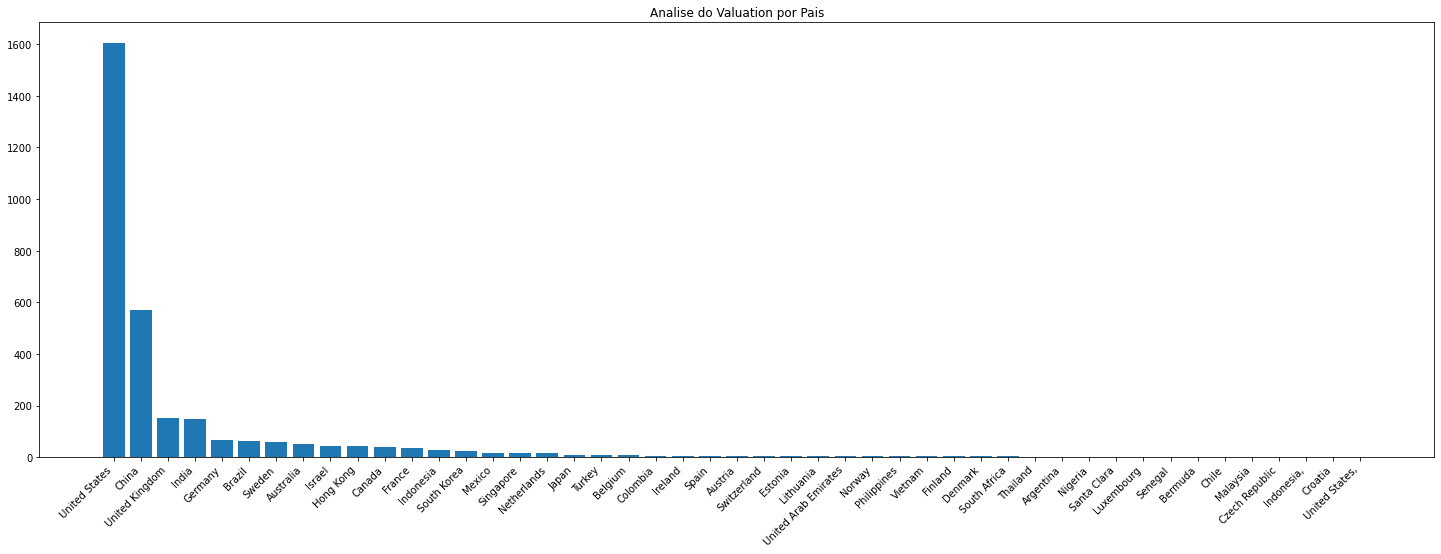

In [ ]:
plt.figure(figsize=(25,8))
plt.title('Analise do Valuation por Pais')
plt.bar(analise_valor['Pais'],analise_valor['Valor ($)'])
plt.xticks(rotation=45, ha='right');


In [82]:
# Análise de Valores por Ano
analise_Ano_valores = base_dados.groupby(by='Ano').sum()['Valor ($)'].reset_index() 
analise_Ano_valores.head()

,Ano,Valor ($)
0,2007,1.38
1,2010,3.00
2,2011,51.30
3,2012,122.30
4,2013,4.30


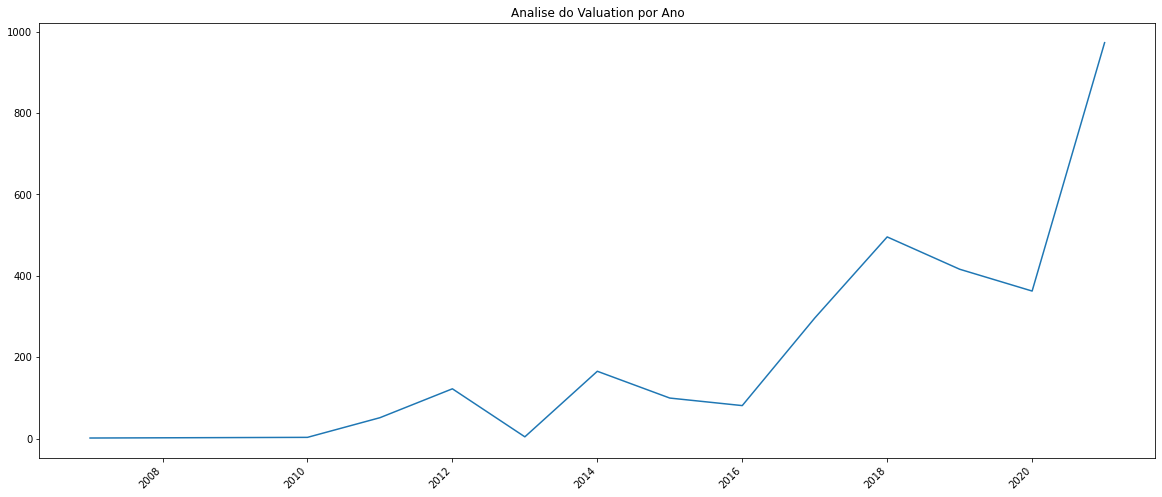

In [85]:
plt.figure(figsize=(20,8))
plt.title('Analise do Valuation por Ano')
plt.plot(analise_Ano_valores['Ano'],analise_Ano_valores['Valor ($)'])
plt.xticks(rotation=45, ha='right');
